Gender
----------
{0, 1}
-------------
Age
----------
{14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 51, 52, 55, 56, 61}
-------------
Height
----------
{1.62, 1.78, 1.8, 1.52, 1.5, 1.64, 1.72, 1.85, 1.65, 1.77, 1.75, 1.58, 1.67, 1.83, 1.92, 1.93, 1.68, 1.76, 1.84, 1.59, 1.51, 1.69, 1.6, 1.94, 1.7, 1.53, 1.61, 1.86, 1.45, 1.95, 1.71, 1.79, 1.63, 1.88, 1.87, 1.54, 1.46, 1.55, 1.89, 1.56, 1.81, 1.73, 1.48, 1.9, 1.98, 1.66, 1.82, 1.57, 1.74, 1.91, 1.49}
-------------
Weight
----------
{131.4, 39.0, 40.0, 41.3, 42.0, 42.3, 44.0, 45.0, 44.8, 47.0, 48.0, 49.0, 50.4, 50.0, 51.0, 52.0, 53.0, 54.5, 55.3, 55.0, 56.0, 57.0, 59.0, 59.8, 58.0, 58.5, 60.0, 64.4, 61.0, 67.8, 66.5, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 72.0, 71.0, 74.0, 75.0, 76.0, 81.0, 77.0, 78.0, 79.0, 80.0, 82.0, 83.0, 84.0, 85.0, 85.5, 87.0, 88.0, 89.8, 90.0, 91.0, 93.0, 93.5, 95.0, 94.0, 96.0, 98.0, 104.6, 104.8, 99.0, 1

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'family_history_with_overweight'}>,
        <Axes: title={'center': 'FAVC'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>],
       [<Axes: title={'center': 'CAEC'}>,
        <Axes: title={'center': 'SMOKE'}>,
        <Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'SCC'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: title={'center': 'CALC'}>,
        <Axes: title={'center': 'MTRANS'}>]], dtype=object)

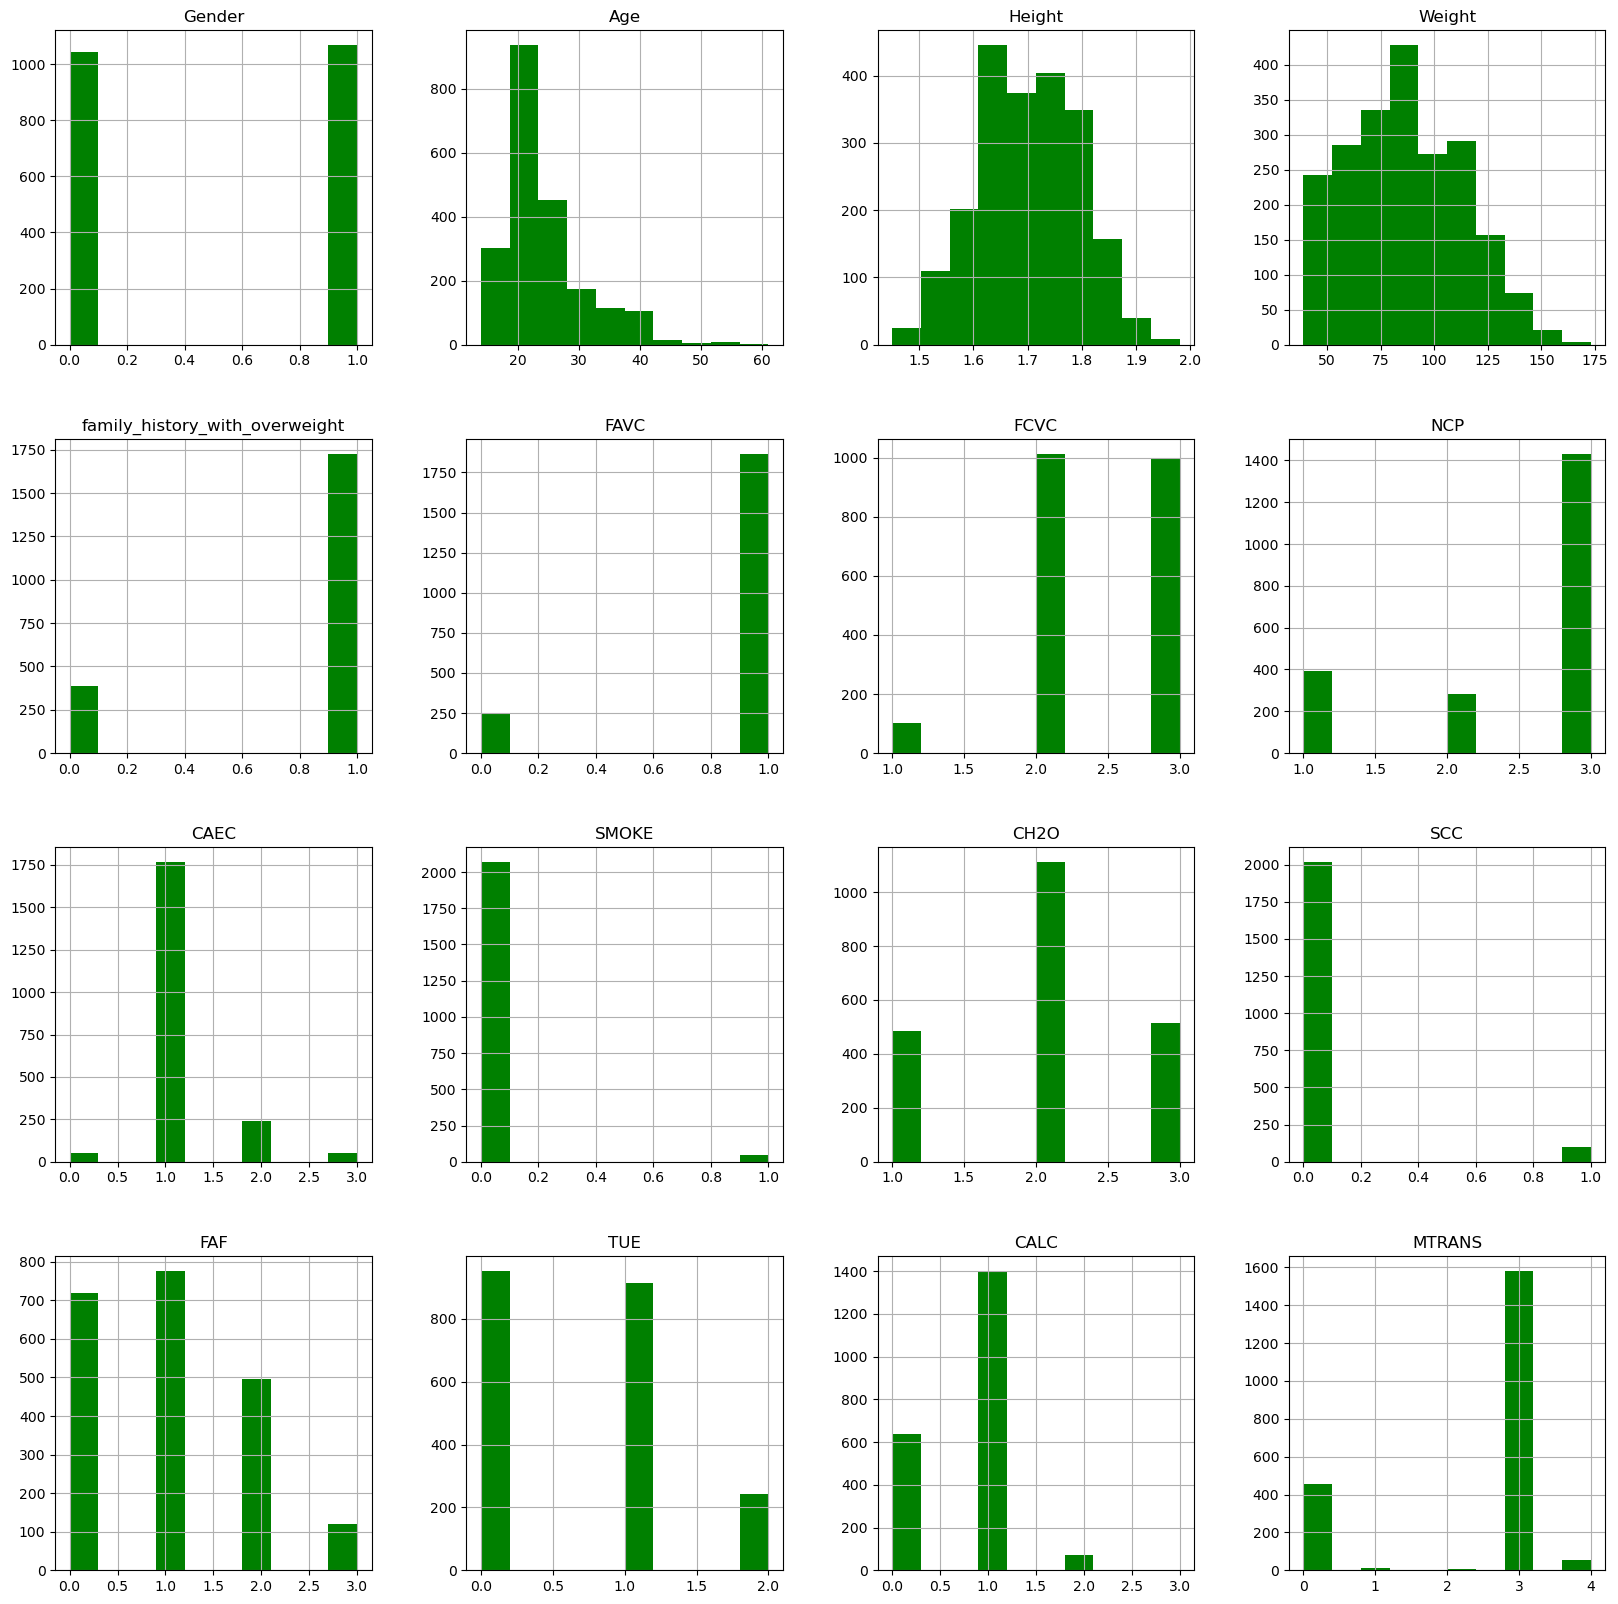

In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn as sk

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# charger les données
df=pd.read_csv('../data/dataset.csv')

# transformer toutes les valeurs non numérique en entier
df["Gender"] = (df['Gender'] == 'Male').astype(int)
df.family_history_with_overweight = (df.family_history_with_overweight == 'yes').astype(int)
df.FAVC = (df.FAVC == 'yes').astype(int)
df.SMOKE = (df.SMOKE == 'yes').astype(int)
df.SCC = (df.SCC == 'yes').astype(int)

# arondi au centième la taille et au dixième le poids. Le reste arrondi à l'unité
for i in df.select_dtypes(exclude = ['object']).columns:
    if i == 'Height':
        df[i] = df[i].round(2)
    elif  i =='Weight':
        df[i] = df[i].round(1)
    elif i != 'NCP':
        df[i] = df[i].round(0)

def encode_NCP(code):
    if code < 2:
        return 1
    elif code < 3:
        return 2
    else :
        return 3
    
def encode_CAEC_CALC(code):
    if code == "no":
        return 0
    if code == "Sometimes":
        return 1
    if code == "Frequently":
        return 2
    if code == "Always":
        return 3
    
    raise Exception(f"Unknown code: {code}")

def encode_public_transport(code):
    if code == "Automobile":
        return 0
    if code == "Motorbike":
        return 1
    if code == "Bike":
        return 2
    if code == "Public_Transportation":
        return 3
    if code == "Walking":
        return 4
    
    raise Exception(f"Unknown code: {code}")
   
df["NCP"] = df["NCP"].apply(encode_NCP)
df["CAEC"] = df["CAEC"].apply(encode_CAEC_CALC)
df["CALC"] = df["CALC"].apply(encode_CAEC_CALC)
df["MTRANS"] = df["MTRANS"].apply(encode_public_transport)
df['Age'] = df['Age'].astype('int64')
df['FCVC'] = df['FCVC'].astype('int64')
df['FAF'] = df['FAF'].astype('int64')
df['CH2O'] = df['CH2O'].astype('int64')
df['TUE'] = df['TUE'].astype('int64')

for i in df.columns:
    print(i)
    print("----------")
    print(set(df[i].tolist()))
    print("-------------")



In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


def get_classification_score(dataset, list_of_features, label, model=svm.SVC(gamma=0.001), dropna=True):
    temp = dataset.copy()
    if dropna:
        temp = temp.dropna()
        
    y = temp.pop(label)
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(temp, y,test_size=0.25, random_state=0)
    
    # Xtrain = Xtrain[list_of_features].values
    # Xtest = Xtest[list_of_features].values
        
    if len(Xtrain.shape) < 2:
        Xtrain = Xtrain.reshape(-1, 1)
        
    if len(Xtest.shape) < 2:
        Xtest = Xtest.reshape(-1, 1)
        
    model.fit(Xtrain,ytrain)

    ypredit = model.predict(Xtest)
    
    print(classification_report(ytest, ypredit))
    print(confusion_matrix(ytest, ypredit))
    return accuracy_score(ytest, ypredit)

def compare_features(
    dataset, 
    list_of_features_1, 
    list_of_features_2,
    label,
    ):
    
    score_1 = get_classification_score(dataset, list_of_features_1, label)
    score_2 = get_classification_score(dataset, list_of_features_2, label)
    
    print(f"Avec les colonnes {list_of_features_1}, le score est de {score_1}.")
    print(f"Avec les colonnes {list_of_features_2}, le score est de {score_2}.")

compare_features(df, ["MTRANS", "Weight", "SMOKE", "CAEC"], ["Weight"], "NObeyesdad")

rf_clf = RandomForestClassifier(
    random_state=77,
    criterion='entropy',    
    max_depth=20,
    class_weight='balanced',    
    n_estimators=700,
)

score_1 = get_classification_score(df, "", "NObeyesdad", rf_clf)
print(score_1)


                     precision    recall  f1-score   support

Insufficient_Weight       0.76      0.95      0.84        78
      Normal_Weight       0.60      0.43      0.50        69
     Obesity_Type_I       0.58      0.49      0.53        86
    Obesity_Type_II       0.98      0.79      0.88        73
   Obesity_Type_III       0.93      1.00      0.96        88
 Overweight_Level_I       0.60      0.57      0.59        68
Overweight_Level_II       0.38      0.50      0.43        66

           accuracy                           0.69       528
          macro avg       0.69      0.68      0.68       528
       weighted avg       0.70      0.69      0.69       528

[[74  4  0  0  0  0  0]
 [23 30  1  0  0 15  0]
 [ 0  0 42  1  2  1 40]
 [ 0  0 10 58  5  0  0]
 [ 0  0  0  0 88  0  0]
 [ 1 11  2  0  0 39 15]
 [ 0  5 18  0  0 10 33]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.76      0.95      0.84        78
      Normal_Weight       0.60    